In [196]:
import jax
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
# before execute any computation / allocation
print(jax.numpy.ones(3).device()) # TFRT_CPU_0

TFRT_CPU_0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mkgp import *

In [197]:
print(jax.__version__)
print(jax.default_backend())
print(jax.devices())

0.4.7
cpu
[CpuDevice(id=0)]


# 1D

In [231]:
x = np.linspace(0,1,100)[:,None]
kernel1 = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.8)
kernel2 = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.1)
kernel3 = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.001)


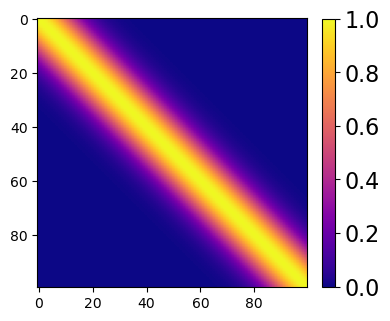

In [232]:

fig = plt.figure(1,figsize=(4,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])
im1 = ax1.imshow(kernel2.K(x),cmap='plasma')
#im1.set_clim(-1,1)
cb = plt.colorbar(im1,ax=ax1,fraction=0.045, pad=0.05)
cb.ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig('kernel_lowl.pdf')

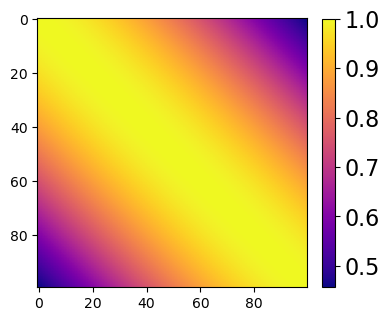

In [187]:

fig = plt.figure(1,figsize=(4,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])
im1 = ax1.imshow(kernel1.K(x),cmap='plasma')
#im1.set_clim(-1,1)
cb = plt.colorbar(im1,ax=ax1,fraction=0.045, pad=0.05)
cb.ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig('kernel_highl.pdf')

In [239]:


prior_samples1 = np.random.multivariate_normal(np.zeros(kernel1.K(x).shape[0]), kernel1.K(x), size=3)
prior_samples2 = np.random.multivariate_normal(np.zeros(kernel2.K(x).shape[0]), kernel2.K(x), size=3)
#prior_samples3 = np.random.multivariate_normal(np.zeros(kernel2.K(x).shape[0]), kernel3.K(x), size=3)


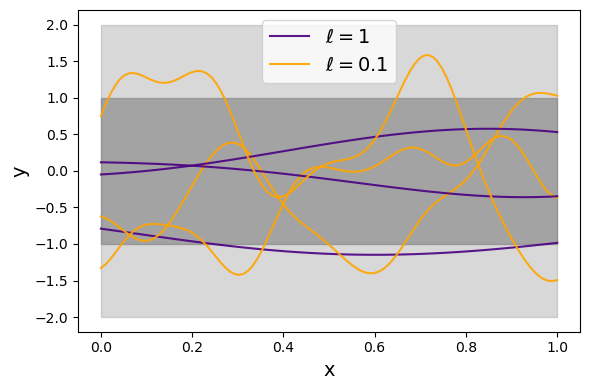

In [243]:
fig = plt.figure(1,figsize=(6,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])

ax1.fill_between(x.flatten(),-2,2,color='grey',alpha=0.3)
ax1.fill_between(x.flatten(),-1,1,color='grey',alpha=0.6)

ax1.plot(x,prior_samples1[-1],c='indigo',alpha=0.9,label=r'$\ell=1$')
ax1.plot(x,prior_samples2[-1],c='orange',alpha=0.9,label=r'$\ell=0.1$')
for i in range(2):
    #ax1.plot(x,prior_samples3[i],c='darkred',alpha=0.5)
    ax1.plot(x,prior_samples1[i],c='indigo',alpha=0.9)
    ax1.plot(x,prior_samples2[i],c='orange',alpha=0.9)
    
ax1.set_ylabel('y',size=14)
ax1.set_xlabel('x',size=14)
ax1.legend(fontsize=14)
fig.tight_layout()

fig.savefig('gp_prior.pdf')

In [244]:
def toy(x):
    return 1*np.sin(x/1.)*x + x**1.3

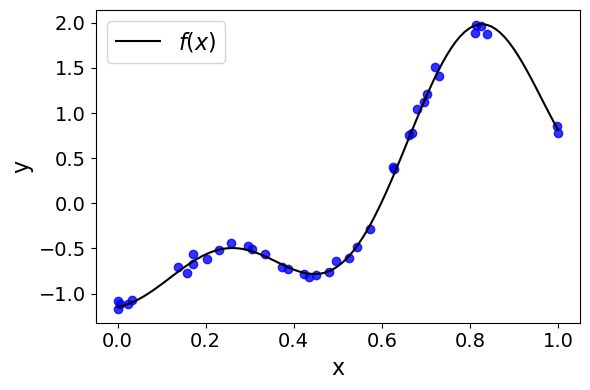

In [251]:
x_true = np.linspace(0,10,100)[:,None]
y_true = toy(x_true)

x = np.random.random((40,1))*10
y = toy(x) + np.random.normal(loc=0,scale=0.5,size=40)[:,None]

### norm
x_true = (x_true - x_true.min())/ (x_true.max() -  x_true.min())
x = (x - x.min())/ (x.max() -  x.min())

y_true = (y_true - y.mean())/y.std()
y = (y - y.mean())/y.std()


fig = plt.figure(1,figsize=(6,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])


ax1.scatter(x,y,c='b',alpha=0.8)
ax1.plot(x_true,y_true,c='k',label=r'$f(x)$')

ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('x',size=16)
ax1.set_ylabel('y',size=16)

fig.tight_layout()
fig.savefig('dataset.pdf')

In [252]:
kernel = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.5)
noise = White_MK(input_dim=1, variance=0.1)

m = MultiKroModel([x],y.flatten(),[kernel],[noise],nugget_s=1e-9)

pred_1,cov_1 = m.predict([x_true],N_thread=1,compute_cov=True)
pred_1 = pred_1.flatten()

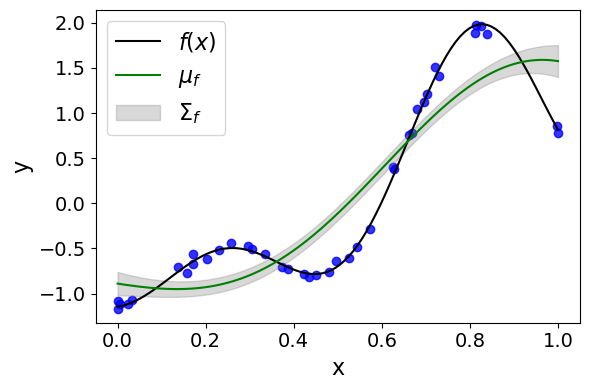

In [253]:


fig = plt.figure(1,figsize=(6,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])


ax1.scatter(x,y,c='b',alpha=0.8)
ax1.plot(x_true,y_true,c='k',label=r'$f(x)$')
ax1.plot(x_true,pred_1,c='green',label=r'$\mu_f$')
ax1.fill_between(x_true.flatten(),pred_1-np.sqrt(np.diag(cov_1)),pred_1+np.sqrt(np.diag(cov_1)),color='grey',alpha=0.3,label=r'$\Sigma_f$')

ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('x',size=16)
ax1.set_ylabel('y',size=16)

fig.tight_layout()
fig.savefig('large_l.pdf')


In [254]:
kernel = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.02)
noise = White_MK(input_dim=1, variance=0.01)

m = MultiKroModel([x],y.flatten(),[kernel],[noise],nugget_s=1e-9)

pred_1,cov_1 = m.predict([x_true],N_thread=1,compute_cov=True)
pred_1 = pred_1.flatten()

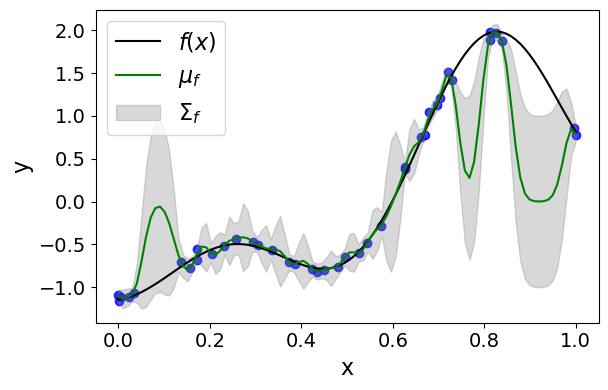

In [255]:


fig = plt.figure(1,figsize=(6,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])


ax1.scatter(x,y,c='b',alpha=0.8)
ax1.plot(x_true,y_true,c='k',label=r'$f(x)$')
ax1.plot(x_true,pred_1,c='green',label=r'$\mu_f$')
ax1.fill_between(x_true.flatten(),pred_1-np.sqrt(np.diag(cov_1)),pred_1+np.sqrt(np.diag(cov_1)),color='grey',alpha=0.3,label=r'$\Sigma_f$')

ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('x',size=16)
ax1.set_ylabel('y',size=16)

fig.tight_layout()

fig.savefig('small_l.pdf')


In [256]:
kernel =RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.02)
noise = White_MK(input_dim=1, variance=1)

m = MultiKroModel([x],y.flatten(),[kernel],[noise],nugget_s=1e-9)

m.optimize('lbfgs',messages=True,max_iters=2000) ##scg, tnc
#m.optimize_restarts(num_restarts = 10,max_iters=2000,messages=False,parallel=False)


In [257]:
pred_1,cov_1 = m.predict([x_true],N_thread=1,compute_cov=True)
pred_1 = pred_1.flatten()

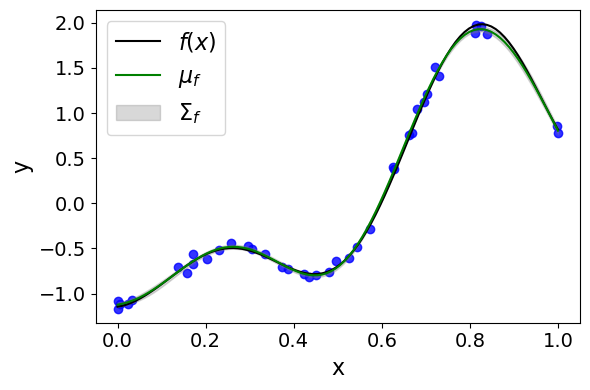

In [258]:


fig = plt.figure(1,figsize=(6,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])


ax1.scatter(x,y,c='b',alpha=0.8)
ax1.plot(x_true,y_true,c='k',label=r'$f(x)$')
ax1.plot(x_true,pred_1,c='green',label=r'$\mu_f$')
ax1.fill_between(x_true.flatten(),pred_1-np.sqrt(np.diag(cov_1)),pred_1+np.sqrt(np.diag(cov_1)),color='grey',alpha=0.3,label=r'$\Sigma_f$')

ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('x',size=16)
ax1.set_ylabel('y',size=16)

fig.tight_layout()
fig.savefig('opti_l.pdf')


# 2D kronecker

In [2]:
x1 = np.linspace(0,1,400)[:,None]
x2 = np.linspace(0,2,400)[:,None]

X = np.concatenate((x1,x2),axis=1)
kernel = RBF_MK(ARD=True,input_dim=2, variance=1, lengthscale=[0.1,0.7])


In [155]:
print(X)

[[0.     0.    ]
 [0.2    0.4469]
 [0.4    0.8938]
 [0.6    1.3407]
 [0.8    1.7876]
 [1.     2.2345]]


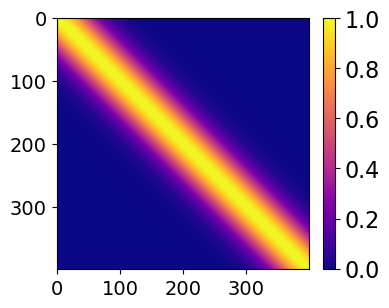

In [56]:
fig = plt.figure(1,figsize=(4,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])
im1 = ax1.imshow(kernel.K(X),cmap='plasma')
#im1.set_clim(-1,1)
cb = plt.colorbar(im1,ax=ax1,fraction=0.045, pad=0.05)
cb.ax.tick_params(labelsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

fig.tight_layout()
fig.savefig('2D_kernel.pdf')

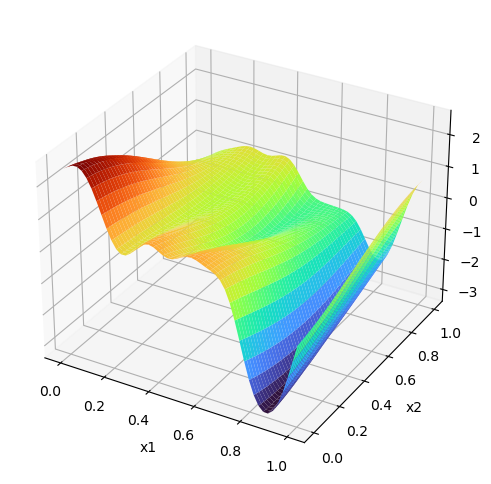

In [198]:
x1 = np.linspace(0,1,50)[:,None]
x2 = np.linspace(0,1,50)[:,None]


X1,X2 = np.meshgrid(x1,x2)
x = np.array([X1.flatten(),X2.flatten()]).T

prior_samples = np.random.multivariate_normal(np.zeros(kernel.K(x).shape[0]), kernel.K(x), size=(1,))


x1_mesh1,x1_mesh2 = np.meshgrid(x1,x2)

fig = plt.figure(i,figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1_mesh1, x1_mesh2,np.reshape(prior_samples,(50,50)),cmap=cm.turbo)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

fig.savefig('2D_prior.pdf')

In [60]:
x1 = np.linspace(0,1,20)[:,None]
x2 = np.linspace(0,1,20)[:,None]

kernel1 = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.1)
kernel2 = RBF_MK(ARD=True,input_dim=1, variance=1, lengthscale=0.5)


In [16]:

x_kro = np.concatenate((np.repeat(x1, 20,axis=0),np.tile(x2.flatten(),50)[:,None]),axis=1)
print(fne)

x_rand = np.random.random(x_kro.shape) - x_rand.min()

[[0.         0.        ]
 [0.         0.05263158]
 [0.         0.10526316]
 ...
 [1.         0.89473684]
 [1.         0.94736842]
 [1.         1.        ]]


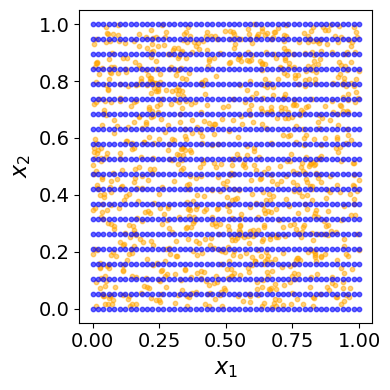

In [58]:
fig = plt.figure(1,figsize=(4,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])

ax1.scatter(x_rand[:,0],x_rand[:,1],c='orange',alpha=0.5,s=10,label='random sampling')
ax1.scatter(x_kro[:,0],x_kro[:,1],c='b',alpha=0.6,s=10,label='grid sampling')

ax1.set_xlabel(r'$x_1$',size=16)
ax1.set_ylabel(r'$x_2$',size=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

fig.tight_layout()
#fig.savefig('grid_sampling2.pdf')

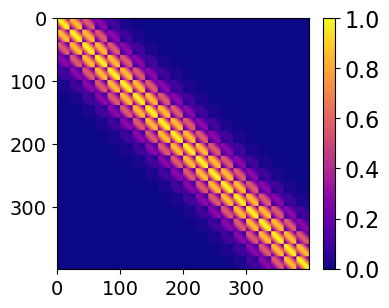

In [62]:
fig = plt.figure(1,figsize=(4,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])
im1 = ax1.imshow(jnp.kron(kernel1.K(x1),kernel2.K(x2)),cmap='plasma')
#im1.set_clim(-1,1)
cb = plt.colorbar(im1,ax=ax1,fraction=0.045, pad=0.05)
cb.ax.tick_params(labelsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

fig.tight_layout()
fig.savefig('kronecker_cov.pdf')

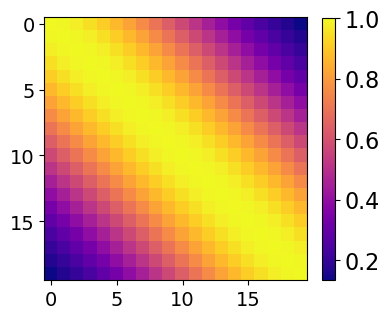

In [67]:
fig = plt.figure(1,figsize=(4,4))
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0,0])
im1 = ax1.imshow(kernel2.K(x2),cmap='plasma')
#im1.set_clim(-1,1)
cb = plt.colorbar(im1,ax=ax1,fraction=0.045, pad=0.05)
cb.ax.tick_params(labelsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

fig.tight_layout()
fig.savefig('kronecker_cov2.pdf')

 /tmp/ipykernel_921342/2377002139.py:8: RuntimeWarning:covariance is not symmetric positive-semidefinite.


Text(0.5, 0.5, 'x2')

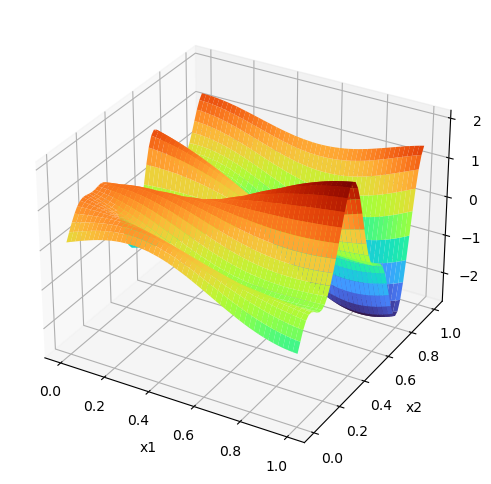

In [14]:

x1 = np.linspace(0,1,50)[:,None]
x2 = np.linspace(0,1,50)[:,None]

X1,X2 = np.meshgrid(x1,x2)
x = np.array([X1.flatten(),X2.flatten()]).T


prior_samples2 = np.random.multivariate_normal(np.zeros(jnp.kron(kernel1.K(x1),kernel2.K(x2)).shape[0]), jnp.kron(kernel1.K(x1),kernel2.K(x2)), size=(1,))

x1_mesh1,x1_mesh2 = np.meshgrid(x1,x2)


fig = plt.figure(i,figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1_mesh1, x1_mesh2,np.reshape(prior_samples2,(50,50)),cmap=cm.turbo)
ax.set_xlabel('x1')
ax.set_ylabel('x2')